In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from IPython.display import SVG
import IPython.display as display

import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import plot_model
from keras.utils import model_to_dot

Using TensorFlow backend.


In [2]:
#https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd

In [3]:
dfTrain = pd.read_csv('train.csv')
dfTest  = pd.read_csv('test.csv')

X     = dfTrain[dfTrain.columns[1:]].to_numpy().reshape(42000,28*28)
y     = to_categorical(dfTrain[dfTrain.columns[0]].to_numpy())
#y     = dfTrain[dfTrain.columns[0]].to_numpy()

train_X, valid_X, train_y, valid_y = train_test_split(X,y,shuffle=False, random_state=1,train_size=0.95)
test_X = dfTest.to_numpy().reshape(28000,28*28)

print(train_X.shape,valid_X.shape)

(39900, 784) (2100, 784)


In [71]:
modelA = tf.keras.Sequential(
  [
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

modelB = tf.keras.Sequential(
  [
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(200, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(60, activation='sigmoid'),
    tf.keras.layers.Dense(30, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

modelC = tf.keras.Sequential(
  [
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

modelD = tf.keras.Sequential(
  [
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelC.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelD.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
BATCH_SIZE = 100
EPOCHS = 30

steps_per_epoch = 42000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)
historyA = modelA.fit(train_X, train_y, 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=EPOCHS,
                    validation_data=(valid_X, valid_y), 
                    validation_steps=1)

historyB = modelB.fit(train_X, train_y, 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=EPOCHS,
                    validation_data=(valid_X, valid_y), 
                    validation_steps=1)

historyC = modelC.fit(train_X, train_y, 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=EPOCHS,
                    validation_data=(valid_X, valid_y), 
                    validation_steps=1)

historyD = modelD.fit(train_X, train_y, 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=EPOCHS,
                    validation_data=(valid_X, valid_y), 
                    validation_steps=1)

Steps per epoch:  420
Train on 31500 samples, validate on 10500 samples
Epoch 1/30
31500/31500 [==============================] - 1s 32us/sample - loss: 4.5524 - accuracy: 0.1940 - val_loss: 0.0135 - val_accuracy: 0.3600
Epoch 2/30
31500/31500 [==============================] - 1s 21us/sample - loss: 1.8073 - accuracy: 0.3734 - val_loss: 0.0095 - val_accuracy: 0.5733
Epoch 3/30
31500/31500 [==============================] - 1s 20us/sample - loss: 1.4215 - accuracy: 0.5183 - val_loss: 0.0069 - val_accuracy: 0.7333
Epoch 4/30
31500/31500 [==============================] - 1s 21us/sample - loss: 1.0636 - accuracy: 0.6638 - val_loss: 0.0035 - val_accuracy: 0.8400
Epoch 5/30
31500/31500 [==============================] - 1s 20us/sample - loss: 0.7665 - accuracy: 0.7745 - val_loss: 0.0022 - val_accuracy: 0.9067
Epoch 6/30
31500/31500 [==============================] - 1s 20us/sample - loss: 0.6236 - accuracy: 0.8224 - val_loss: 0.0019 - val_accuracy: 0.9467
Epoch 7/30
31500/31500 [==========

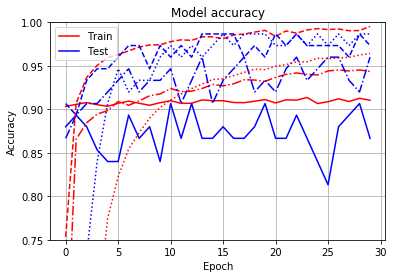

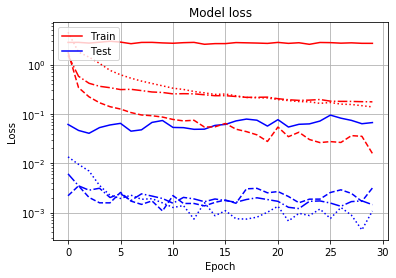

In [80]:
plt.plot(historyA.history['accuracy'],    color='red', linestyle='-')
plt.plot(historyA.history['val_accuracy'],color='blue',linestyle='-')
plt.plot(historyB.history['accuracy'],    color='red', linestyle='-.')
plt.plot(historyB.history['val_accuracy'],color='blue',linestyle='-.')
plt.plot(historyC.history['accuracy'],    color='red', linestyle='--')
plt.plot(historyC.history['val_accuracy'],color='blue',linestyle='--')
plt.plot(historyD.history['accuracy'],    color='red', linestyle=':')
plt.plot(historyD.history['val_accuracy'],color='blue',linestyle=':')
plt.grid(True)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.75,1.0)
plt.show()

# Plot training & validation loss values
plt.semilogy(historyA.history['loss'],    color='red', linestyle='-')
plt.semilogy(historyA.history['val_loss'],color='blue',linestyle='-')
plt.semilogy(historyB.history['loss'],    color='red', linestyle='-.')
plt.semilogy(historyB.history['val_loss'],color='blue',linestyle='-.')
plt.semilogy(historyC.history['loss'],    color='red', linestyle='--')
plt.semilogy(historyC.history['val_loss'],color='blue',linestyle='--')
plt.semilogy(historyD.history['loss'],    color='red', linestyle=':')
plt.semilogy(historyD.history['val_loss'],color='blue',linestyle=':')
plt.grid(True)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [169]:
BATCH_SIZE = 100
EPOCHS = 10

steps_per_epoch = 42000//BATCH_SIZE

modelE = tf.keras.Sequential(
  [
    tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28,28,1)),
    tf.keras.layers.Conv2D(kernel_size=6, filters=6,  strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=5, filters=12, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=4, filters=24, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

modelF = tf.keras.Sequential(
  [
    tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28,28,1)),
    tf.keras.layers.Conv2D(kernel_size=5, filters=24, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(kernel_size=5, filters=48, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(kernel_size=5, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

modelE.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelF.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [170]:
historyF = modelF.fit(train_X, train_y, 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=EPOCHS,
                    validation_data=(valid_X, valid_y), 
                    validation_steps=1)

Train on 39900 samples, validate on 2100 samples
Epoch 1/10
39900/39900 [==============================] - 21s 516us/sample - loss: 0.2050 - accuracy: 0.9355 - val_loss: 0.0090 - val_accuracy: 0.9579
Epoch 2/10
39900/39900 [==============================] - 20s 497us/sample - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.0015 - val_accuracy: 0.9895
Epoch 3/10
39900/39900 [==============================] - 20s 495us/sample - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0020 - val_accuracy: 0.9789
Epoch 4/10
39900/39900 [==============================] - 20s 498us/sample - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0037 - val_accuracy: 0.9684
Epoch 5/10
39900/39900 [==============================] - 20s 494us/sample - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0063 - val_accuracy: 0.9684
Epoch 6/10
39900/39900 [==============================] - 20s 495us/sample - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0018 - val_accuracy: 0.9789
Epoch 7/10
39900/39900 [=====================

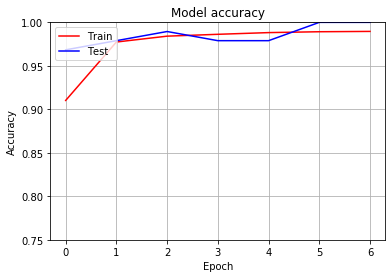

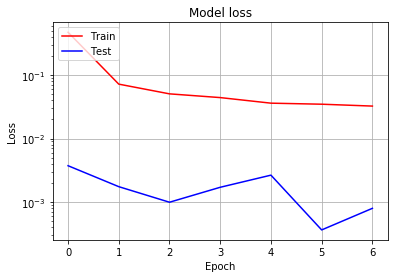

In [140]:
plt.plot(historyE.history['accuracy'],    color='red', linestyle='-')
plt.plot(historyE.history['val_accuracy'],color='blue',linestyle='-')
plt.grid(True)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.75,1.0)
plt.show()

# Plot training & validation loss values
plt.semilogy(historyE.history['loss'],    color='red', linestyle='-')
plt.semilogy(historyE.history['val_loss'],color='blue',linestyle='-')
plt.grid(True)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [171]:
output     = modelF.predict(test_X)
prediction = np.argmax(output,axis=1)

In [172]:
dfOut = pd.DataFrame(data={'ImageId':np.arange(1,28001,1),'Label':prediction})
dfOut.to_csv('submission.csv', index=False)

### resnet plus dataSetEnhancement

In [4]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation
from keras.layers import Add, Flatten, AveragePooling2D, Dense, Dropout
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import time


def residual_block(inputs, filters, strides=1):
    """Residual block
    
    Shortcut after Conv2D -> ReLU -> BatchNorm -> Conv2D
    
    Arguments:
        inputs (tensor): input
        filters (int): Conv2D number of filterns
        strides (int): Conv2D square stride dimensions

    Returns:
        x (tensor): input Tensor for the next layer
    """
    y = inputs # Shortcut path
    
    # Main path
    x = Conv2D(
        filters=filters,
        kernel_size=3,
        strides=strides,
        padding='same',
    )(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(
        filters=filters,
        kernel_size=3,
        strides=1,
        padding='same',
    )(x)
    x = BatchNormalization()(x)
    
    # Fit shortcut path dimenstions
    if strides > 1:
        y = Conv2D(
        filters=filters,
        kernel_size=3,
        strides=strides,
        padding='same',
        )(y)
        y = BatchNormalization()(y)
    
    # Concatenate paths
    x = Add()([x, y])
    x = Activation('relu')(x)
    
    return x
    
    
def resnet(input_shape, num_classes, filters, stages):
    """ResNet 
    
    At the beginning of each stage downsample feature map size 
    by a convolutional layer with strides=2, and double the number of filters.
    The kernel size is the same for each residual block.
    
    Arguments:
        input_shape (3D tuple): shape of input Tensor
        filters (int): Conv2D number of filterns
        stages (1D list): list of number of resiual block in each stage eg. [2, 5, 5, 2]
    
    Returns:
        model (Model): Keras model
    """
    # Start model definition
    inputs = Input(shape=input_shape)
    x = Conv2D(
        filters=filters,
        kernel_size=7,
        strides=1,
        padding='same',
    )(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Stack residual blocks
    for stage in stages:
        x = residual_block(x, filters, strides=2)
        for i in range(stage-1):
            x = residual_block(x, filters)
        filters *= 2
        
    # Pool -> Flatten -> Classify
    x = AveragePooling2D(4)(x)
    x = Flatten()(x)
    x = Dropout(0.3)(x)
    x = Dense(int(filters/4), activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Instantiate model
    model = Model(inputs=inputs, outputs=outputs)
    return model 


# Reshape and normalize
X = dfTrain.drop(columns=['label']).values.reshape(-1, 28, 28, 1) / 255
y = dfTrain['label'].values

test = dfTest.values.reshape(-1, 28, 28, 1) / 255

# Get training and testing datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

epochs=10
filters=64
stages=[3, 3, 3]
batch_size=128

model = resnet(
    input_shape=X[0].shape,
    num_classes=np.unique(y).shape[-1],
    filters=filters, 
    stages=stages)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint(
    filepath=f'resnet-{int(time.time())}.dhf5',
    monitor='loss',
    save_best_only=True
)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

callbacks = [checkpoint, annealer]

# Define data generator
datagen = ImageDataGenerator(  
    rotation_range=10,  
    zoom_range=0.1, 
    width_shift_range=0.1, 
    height_shift_range=0.1
)
datagen.fit(X)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    epochs=epochs, 
    verbose=1,
    callbacks=callbacks)

Epoch 1/10
296/296 [==============================] - 199s 671ms/step - loss: 0.2423 - accuracy: 0.9265 - val_loss: 17.8663 - val_accuracy: 0.0986
Epoch 2/10
296/296 [==============================] - 198s 671ms/step - loss: 0.0761 - accuracy: 0.9783 - val_loss: 0.0647 - val_accuracy: 0.9807
Epoch 3/10
296/296 [==============================] - 201s 680ms/step - loss: 0.0480 - accuracy: 0.9857 - val_loss: 0.0705 - val_accuracy: 0.9793
Epoch 4/10
296/296 [==============================] - 203s 686ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0855 - val_accuracy: 0.9774
Epoch 5/10
296/296 [==============================] - 206s 694ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0427 - val_accuracy: 0.9886
Epoch 6/10
296/296 [==============================] - 205s 694ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0426 - val_accuracy: 0.9876
Epoch 7/10
296/296 [==============================] - 205s 691ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0272 

In [ ]:
output     = model.predict(test_X)
prediction = np.argmax(output,axis=1)
dfOut = pd.DataFrame(data={'ImageId':np.arange(1,28001,1),'Label':prediction})
dfOut.to_csv('submission.csv', index=False)